<a href="https://colab.research.google.com/github/ShashwatVyas926/AER850_Project_2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Class Indices: {'crack': 0, 'missing-head': 1, 'paint-off': 2}


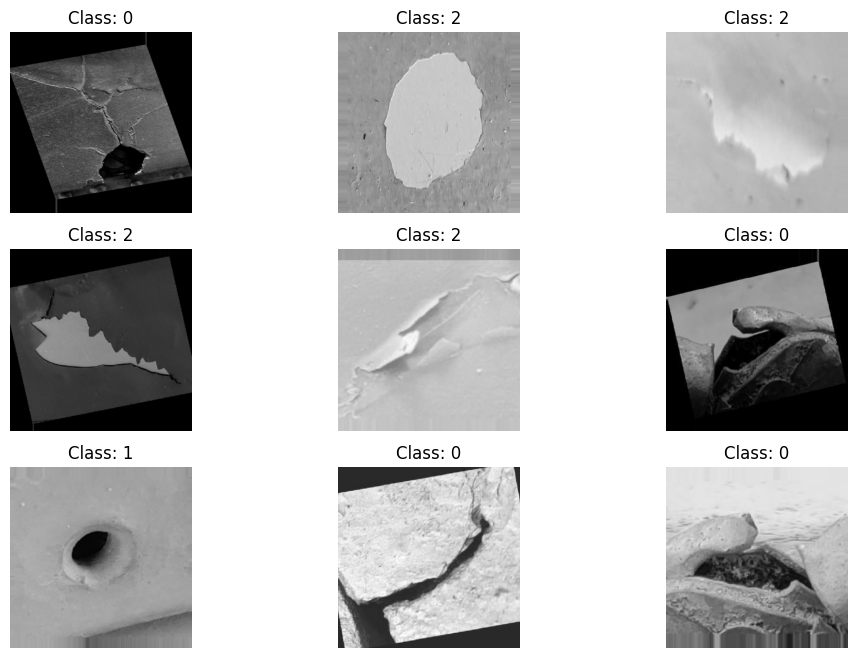

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 498, 498, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 247, 247, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 123, 123, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 121, 121, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 460800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      58,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,076,163 (225.36 MB)

 Trainable params: 59,076,163 (225.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 1362s 20s/step - accuracy: 0.3788 - loss: 3.3403 - val_accuracy: 0.6311 - val_loss: 0.8317
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6038 - loss: 0.9039 - val_accuracy: 0.6427 - val_loss: 0.7671
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6600 - loss: 0.8291 - val_accuracy: 0.6241 - val_loss: 0.7652
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.6371 - loss: 0.8371 - val_accuracy: 0.6265 - val_loss: 0.7450
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6798 - loss: 0.7559 - val_accuracy: 0.6427 - val_loss: 0.7004
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6869 - loss: 0.7065 - val_accuracy: 0.6427 - val_loss: 0.6989
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7053 - loss: 0.6582 - val_accuracy: 0.6891 - val_loss: 0.6908
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.7379 - loss: 0.6172 - val_accuracy: 0.6775 - val_loss: 

Model saved as trained_model.h5
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - accuracy: 0.6950 - loss: 0.6669
Validation Accuracy: 0.70


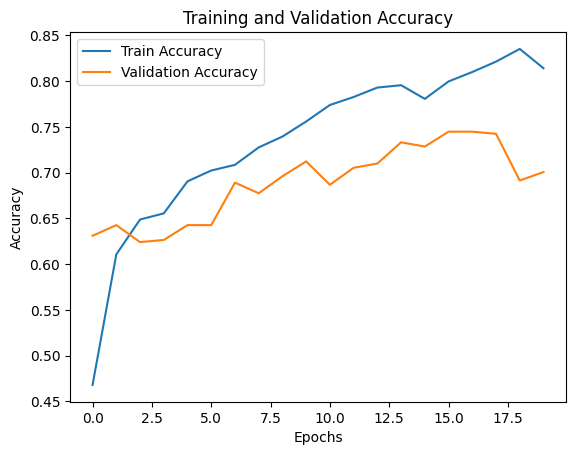

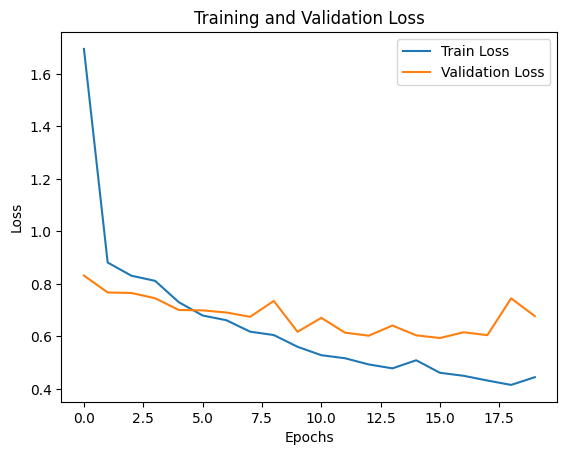

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Data Processing
base_dir = "drive/MyDrive/AER850_Project_2/Data"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

image_size = (500, 500)
batch_size = 32
input_shape = (500, 500, 3)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode='categorical'
)

print("Class Indices:", train_generator.class_indices)

# Example: Display a batch of images
import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.show()

# Neural Network Architecture Design
def create_cnn_model(input_shape=(500, 500, 3), num_classes=3):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
    model.add(Flatten())

# Dense and Dropout Layer
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()

# Model Evaluation
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    verbose=1
)

model.save("/content/drive/MyDrive/AER850_Project_2/trained_model.h5")
print("Model saved as trained_model.h5")

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Plotting Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

